<a href="https://colab.research.google.com/github/Jack1Hayes/Twitter_disaster_predictor/blob/main/twitter_disaster_predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

test.head()


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Preprocessing

In [ ]:
train = train.drop(columns=['keyword', 'location'])


In [ ]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = SnowballStemmer(language = 'english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(token.lower()) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['text'])
y = train['target']
X_test = vectorizer.transform(test['text'])


In [ ]:
!pip install tensorflow scikeras scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:



X_train = X_train.toarray()
X_test = X_test.toarray()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential()
model.add(Dropout(0.1, input_shape=(21637,)))


model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.legacy.Adam(lr=0.0001, decay=1e-6)
y_ints = [int(y) for y in y_train]
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(y_ints),
                                                 y = y_ints)

# Compile the model
model.compile(optimizer=opt, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#print(y_ints)
class_weights = dict(enumerate(class_weights))

#print(y_ints)
history = model.fit(X_train,y_train, epochs=20, 
                    validation_data=(X_test, y_test), shuffle = True, class_weight = class_weights)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
191/191 [==============================] - 6s 28ms/step - loss: 0.6918 - accuracy: 0.5034 - val_loss: 0.6897 - val_accuracy: 0.5791
Epoch 2/20
191/191 [==============================] - 4s 20ms/step - loss: 0.6782 - accuracy: 0.6803 - val_loss: 0.6746 - val_accuracy: 0.6257
Epoch 3/20
191/191 [==============================] - 4s 19ms/step - loss: 0.6439 - accuracy: 0.7429 - val_loss: 0.6486 - val_accuracy: 0.6533
Epoch 4/20
191/191 [==============================] - 4s 23ms/step - loss: 0.5899 - accuracy: 0.8015 - val_loss: 0.6119 - val_accuracy: 0.7019
Epoch 5/20
191/191 [==============================] - 4s 22ms/step - loss: 0.5204 - accuracy: 0.8654 - val_loss: 0.5675 - val_accuracy: 0.7518
Epoch 6/20
191/191 [==============================] - 4s 19ms/step - loss: 0.4470 - accuracy: 0.9061 - val_loss: 0.5322 - val_accuracy: 0.7597
Epoch 7/20
191/191 [==============================] - 4s 21ms/step - loss: 0.3785 - accuracy: 0.9225 - val_loss: 0.4982 - val_accuracy: 0.7787

48/48 [==============================] - 0s 5ms/step
[[0.01541032]
 [0.45962813]
 [0.29806724]
 ...
 [0.98672473]
 [0.9995735 ]
 [0.74110615]]
48/48 [==============================] - 0s 5ms/step
0       0.015410
1       0.459628
2       0.298067
3       0.011655
4       0.649022
          ...   
1518    0.315558
1519    0.999810
1520    0.986725
1521    0.999574
1522    0.741106
Length: 1523, dtype: float64


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

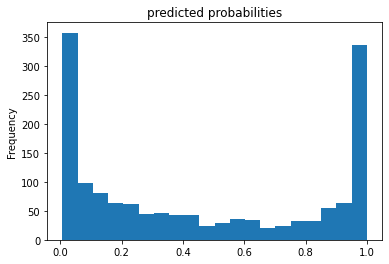

In [ ]:
result = model.predict(X_test)
print(result)

pred_dicts = list(model.predict(X_test))
probs = pd.Series([float(pred) for pred in pred_dicts])

print(probs)
probs.plot(kind='hist', bins=20, title='predicted probabilities')


In [ ]:
from numpy.lib.function_base import append
x = []
y = []
tot = []

for i in probs:
  if i > 0.5:
    x.append(i)
    tot.append(1)
  else:
    y.append(i)
    tot.append(0)
    

print(len(x), len(y))
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, tot))
print(metrics.confusion_matrix(y_test, tot))

663 860
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       874
           1       0.74      0.75      0.75       649

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.78      0.78      0.78      1523

[[700 174]
 [160 489]]
